In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Criando imagem de back groud

(300, 300, 3)


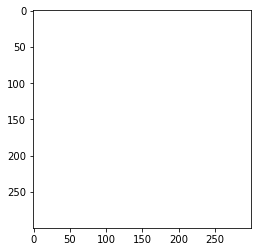

In [2]:
white_bg = np.ones((300, 300, 3), dtype=np.uint8) * 255
plt.imshow(white_bg)
print(white_bg.shape)

## Formando a cabeça

(100, 100, 3)


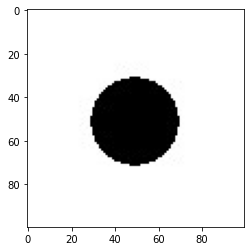

In [3]:
circle = cv2.imread("imagens/circle.jpg", cv2.IMREAD_UNCHANGED)
plt.imshow(circle)
print(circle.shape)

## Adicionar a cabeca ao centro da imagem

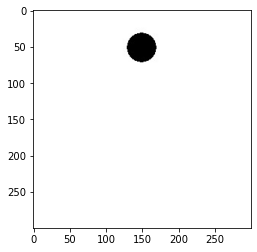

In [4]:
white_bg[0:100, 100:200] = circle
plt.imshow(white_bg)

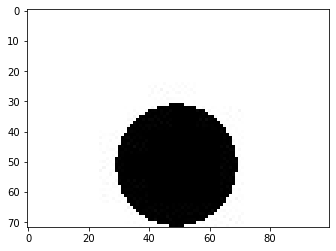

In [5]:
plt.imshow(circle[0:72])

## Formando o tronco

(100, 100, 3)


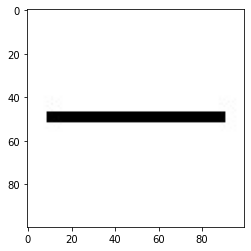

In [6]:
line = cv2.imread("imagens/line.jpg", cv2.IMREAD_UNCHANGED)
plt.imshow(line)
print(line.shape)

## Formando o tronco

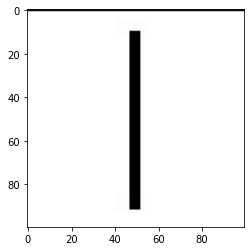

In [7]:
#dimensoes
width_line = line.shape[1]
height_line = line.shape[0]

#rotation 90 graus
x_center = width_line/2
y_center = height_line/2
M_rotation = cv2.getRotationMatrix2D((x_center,y_center),90,1)
tronco = cv2.warpAffine(line,M_rotation,(width_line,height_line))
plt.imshow(tronco)

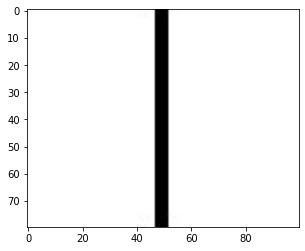

In [8]:
plt.imshow(tronco[10:90])

In [9]:
tronco = tronco[10:90]
print(tronco.shape)

(80, 100, 3)


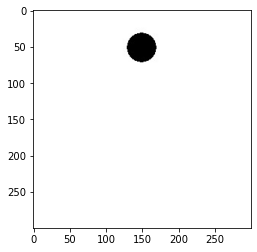

In [10]:
plt.imshow(white_bg)

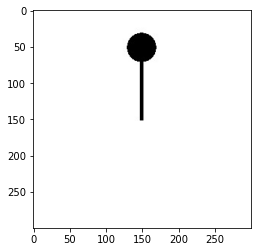

In [11]:
white_bg[72:72+tronco.shape[0], 100:200] = tronco
plt.imshow(white_bg)

## Formando os braços

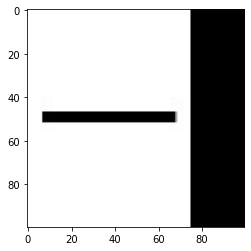

In [12]:
M_scaling = np.float32([[0.75,0,0],[0,1,0]])
braco = cv2.warpAffine(line,M_scaling,(width_line,height_line))
plt.imshow(braco)

(60, 60, 3)


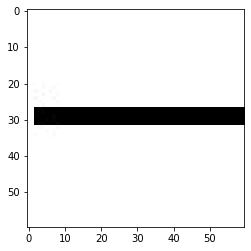

In [13]:
braco = line[20:80:,7:67]
plt.imshow(braco)
print(braco.shape)

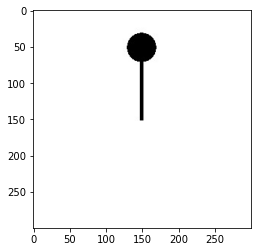

In [14]:
plt.imshow(white_bg)

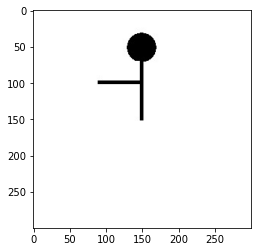

In [15]:
white_bg[70:70+braco.shape[0], 87:87+braco.shape[1]] = braco
plt.imshow(white_bg)

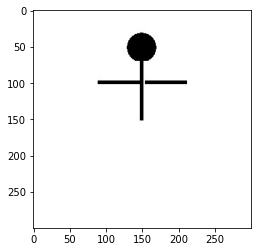

In [16]:
white_bg[70:70+braco.shape[0], 152:152+braco.shape[1]] = braco
plt.imshow(white_bg)

## Formando as pernas

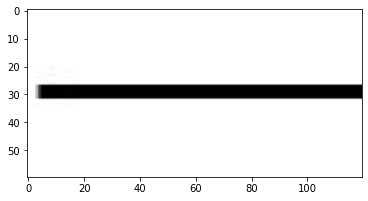

In [17]:
# Redimensionar a perna para ser 2x maior que o braco
perna = cv2.resize(braco, (braco.shape[0]*2, braco.shape[1]), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(perna, cv2.COLOR_BGR2RGB))
plt.show()

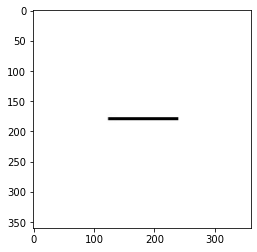

In [18]:
# Adicionar borda branca ao altura da imagem
white = (255, 255, 255)
borda_y = 30
perna = cv2.copyMakeBorder(perna, borda_y, borda_y, 0, 0, cv2.BORDER_CONSTANT, value=white)
# Adicionando borda branca a imagem (susbtituir parte preta ao redimensionar para branco)
width_perna = perna.shape[1]
height_perna = perna.shape[0]
border_size = max(width_perna, height_perna)
perna = cv2.copyMakeBorder(perna, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=white)
plt.imshow(cv2.cvtColor(perna, cv2.COLOR_BGR2RGB))
plt.show()

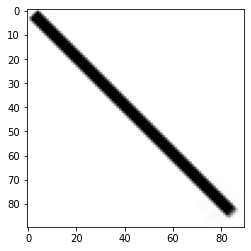

In [19]:
# Ajustando as dimensões da borda
new_width_perna = perna.shape[1]
new_height_perna = perna.shape[0]
x_center = new_width_perna / 2
y_center = new_height_perna / 2
# Rotação da imagem
M_rotation = cv2.getRotationMatrix2D((x_center, y_center), 135, 1)
perna = cv2.warpAffine(perna, M_rotation, (new_width_perna, new_height_perna))
# Recortar a imagem rotacionada para remover a area extra adicionada pela borda
perna = perna[border_size:new_height_perna-border_size, border_size:new_width_perna-border_size]
# Ajustar as bordas
perna = perna[17:107, 15:105]
plt.imshow(cv2.cvtColor(perna, cv2.COLOR_BGR2RGB))
plt.show()

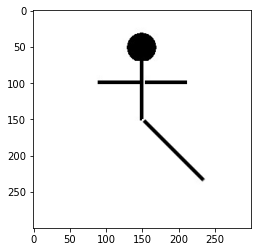

In [20]:
# Adicionar a perna ao back ground
width_perna = perna.shape[1]
height_perna = perna.shape[0]
white_bg[150:150+height_perna, 150:150+width_perna] = perna
plt.imshow(cv2.cvtColor(white_bg, cv2.COLOR_BGR2RGB))
plt.show()

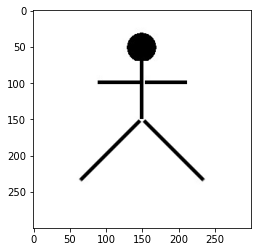

In [21]:
# Inverter a perna 
perna_invertida = cv2.flip(perna, 1)
# Adicionar a outra perna ao back ground
white_bg[150:150+height_perna, 60:60+width_perna] = perna_invertida
plt.imshow(cv2.cvtColor(white_bg, cv2.COLOR_BGR2RGB))
plt.show()